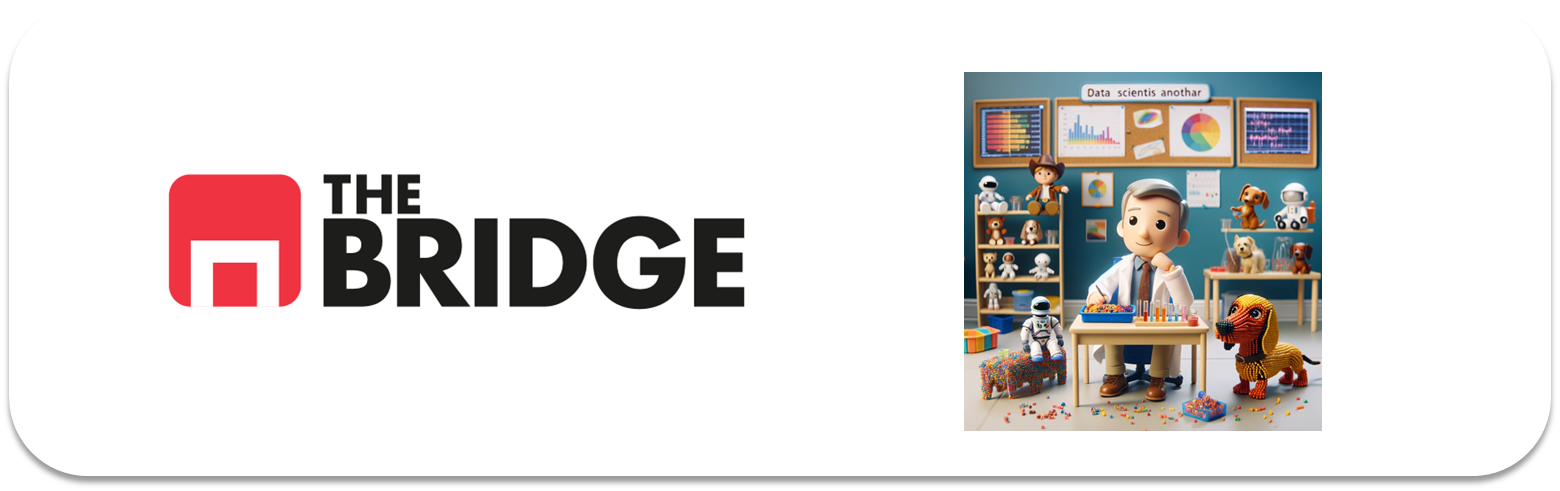

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [4]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [8]:
print(sns.get_dataset_names())
df_titanic = sns.load_dataset('titanic')
df_titanic

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [12]:
print(df_titanic.head(10))
print(df_titanic.info())

#tenemos nulos en age, deck (muchos) y embark_town

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [18]:
null_percentage = df_titanic.isnull().mean() * 100
print(null_percentage)

#Planteamos eliminar las columnas que tengan un % mayor de 50% de nulos:
umbral_nulos = 50.0
df_titanic = df_titanic.drop(columns=null_percentage[null_percentage > umbral_nulos].index)

for column in df_titanic.columns:
    if df_titanic[column].dtype == 'float64' or df_titanic[column].dtype == 'int64':
        df_titanic[column].fillna(df_titanic[column].mean(), inplace=True)
    else:
        df_titanic[column].fillna(df_titanic[column].mode()[0], inplace=True)

df_titanic.drop(columns=['parch'], inplace=True)



survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


C:\Users\Guillem\AppData\Local\Temp\ipykernel_7576\2252818584.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic[column].fillna(df_titanic[column].mean(), inplace=True)
C:\Users\Guillem\AppData\Local\Temp\ipykernel_7576\2252818584.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


#sex es el genero
#age es la edad
#survived es si ha sobrevivido o no (booleano)
#fare es el impuesto pagado para subir
#embarked hay s, c y Q y no se exactamente que quiere decir cada cosa
#class es la clase en la que se viaja
#vuelve a hacer referencia en dos columnas sobre el genero (who) adult male
#deck veo que todo son C's no se que significa de momento
#embark town es la ciudad donde embarca el pasajero
#alive es si sobrevive entiendo al viaje
#alone un booleano si va la persona sola o va acompañada

| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



In [19]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [22]:
df_titanic['embark_town'] = df_titanic['embark_town'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
    })

print(df_titanic['embark_town'].unique())

['Southampton' 'Cherbourg' 'Queenstown']


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

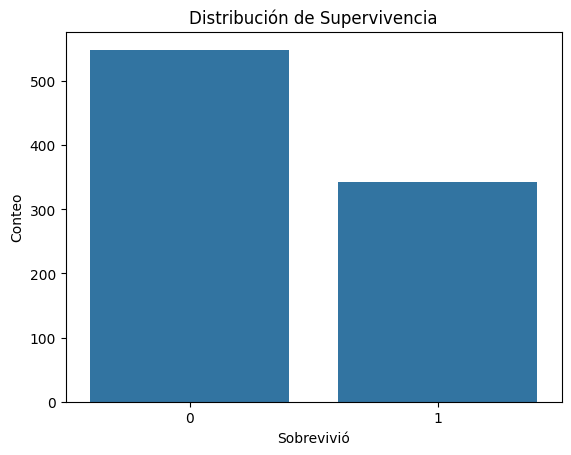

survived
0    549
1    342
Name: count, dtype: int64
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [24]:
sns.countplot(x='survived', data=df_titanic)
plt.title('Distribución de Supervivencia')
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo')
plt.show()

supervivientes = df_titanic['survived'].value_counts()
porcentaje_supervivientes = df_titanic['survived'].value_counts(normalize=True)
print(supervivientes)
print(porcentaje_supervivientes)

#detectamos que un % de personas que estaban en el barco NO sobreviven, por lo que el indice de mortalidad es del 60%

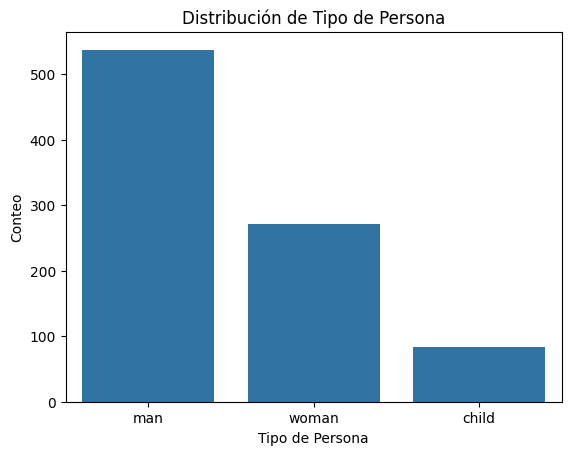

who
man      537
woman    271
child     83
Name: count, dtype: int64
who
man      0.602694
woman    0.304153
child    0.093154
Name: proportion, dtype: float64


In [26]:
sns.countplot(x='who', data=df_titanic)
plt.title('Distribución de Tipo de Persona')
plt.xlabel('Tipo de Persona')
plt.ylabel('Conteo')
plt.show()


tipo_persona = df_titanic['who'].value_counts()
porcentaje_tipo_persona = df_titanic['who'].value_counts(normalize=True)
print(tipo_persona)
print(porcentaje_tipo_persona)

#hay un porcentaje mayoritario de hombres por encima del de mujeres o niños. De hecho solo un 10% de los pasajeros son niños.

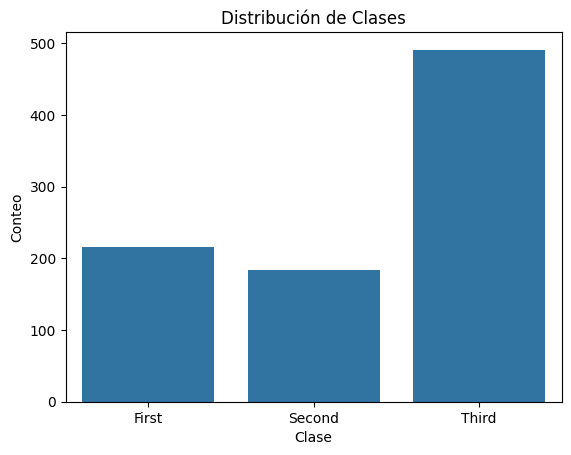

class
Third     491
First     216
Second    184
Name: count, dtype: int64
class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64


In [28]:
sns.countplot(x='class', data=df_titanic)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

# Valores y proporciones
clase = df_titanic['class'].value_counts()
porcentaje_clase = df_titanic['class'].value_counts(normalize=True)
print(clase)
print(porcentaje_clase)

#podemos ver que más de la mitad de los tripulantes viajaban en tercera clase. No obstante, el porcentaje de tripulantes de primera clase es superior al de segunda clase

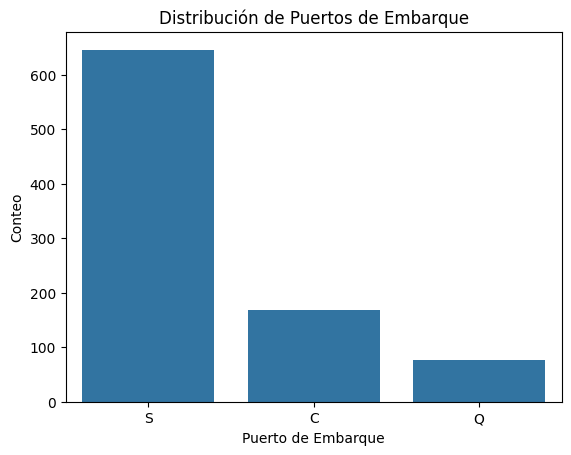

embarked
S    646
C    168
Q     77
Name: count, dtype: int64
embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


In [30]:
sns.countplot(x='embarked', data=df_titanic)
plt.title('Distribución de Puertos de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Conteo')
plt.show()

# Valores y proporciones
ciudad_embarque = df_titanic['embarked'].value_counts()
porcentaje_ciudad_embarque = df_titanic['embarked'].value_counts(normalize=True)
print(ciudad_embarque)
print(porcentaje_ciudad_embarque)

#el  72% de las personas embarcaron en southcampton en detenimiento de las otras dos ciudades de embarque que se reparten el resto. Solo el 8% de los tripulantes salieron de Queenstown

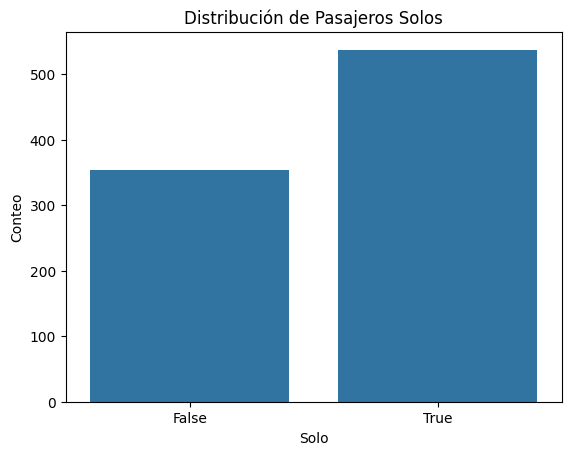

alone
True     537
False    354
Name: count, dtype: int64
alone
True     0.602694
False    0.397306
Name: proportion, dtype: float64


In [31]:
sns.countplot(x='alone', data=df_titanic)
plt.title('Distribución de Pasajeros Solos')
plt.xlabel('Solo')
plt.ylabel('Conteo')
plt.show()

viaja_solo = df_titanic['alone'].value_counts()
porcentaje_viaja_solo = df_titanic['alone'].value_counts(normalize=True)
print(viaja_solo)
print(porcentaje_viaja_solo)
#el 60% de los tripulantes viajan solo. No obstante, sorprende ver que un 40% de los tripulantes estaban yendo acompañados. Aqui evidentemente incluimos a los niños. Siendo la epoca que era, nos surje la pregunta de ver si alguna mujer viajaba sola. 



### #2.2 Numéricas

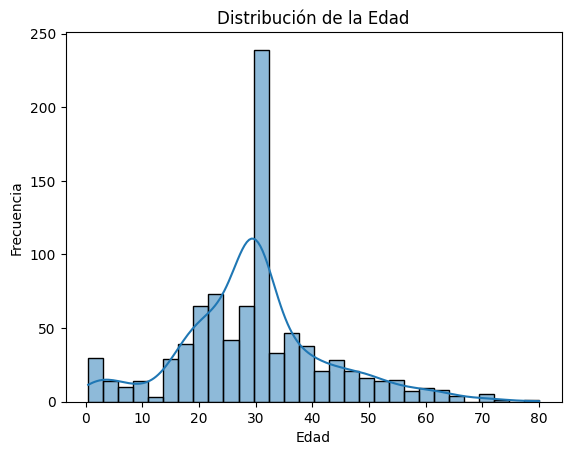

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


In [33]:
sns.histplot(df_titanic['age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
distr_edad = df_titanic['age'].describe()
print(distr_edad)

#la muestra se divide bien separadamente entre los niños y llega hasta una avanzada edad (hay parte de los tripulantes mayor de 70 años)
#la mayoria de los tripulantes se situan dentro de la horquilla de edad adulta comprendida entre 20 y 40 años. De hecho la edad media se situa en los 29 años.
#es interesante ver que además media y mediana coinciden en la misma edad lo que es una buena forma de situar esa edad media. 
#como curiosidad hay un bebe de aproximadamente unos 5 meses


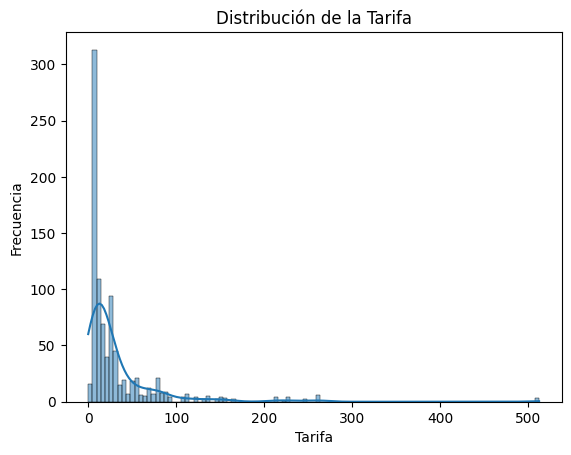

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


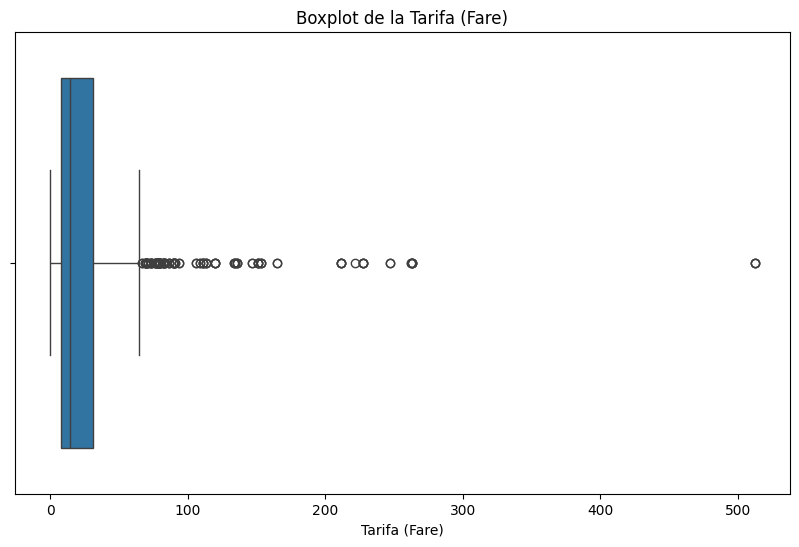

In [35]:
sns.histplot(df_titanic['fare'], kde=True)
plt.title('Distribución de la Tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
tarifa_pagada = df_titanic['fare'].describe()
print(tarifa_pagada)
#pongamos como referencia que pagaban en pesetas (para nombrar la moneda, ya se que no era esa)
#gran parte de la tripulacion se situa en una tarifa pagada inferior a las 100 pesetas
#hubo personas que fueron gratis al barco pero tambien sorprende ver que hubo personas de la tripulacion que pagaron mas de 500 pesetas por subirse al titanic
#Aqui si que es mucho mas interesante tener en cuenta la mediana viendo los valores extemos que existen y que hay valores que están fuera. 
#de hecho si lanzamos el boxplot para verlo, vemos que hay muchos outliers fuera de los bigotes que pagan mas de 100 pesetas. Seria interesante entender 
#porque hay tantas diferencias de tarifas pagadas y porque hay algunos que están asi de fuera
#tambien me parece interesante PLANTEAR la relacion que puede haber entre la tarifa pagada y la clase escogida. Incluso viendo eso si tiene relación con la supervivencia o no de la persona (¿afecta ser rico para sobrevivir?)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_titanic, x='fare')
plt.title('Boxplot de la Tarifa (Fare)')
plt.xlabel('Tarifa (Fare)')
plt.show()

In [ ]:
#Añado que he usado el lanzamiento de las graficas una a una pero también coloco el programa con FOR para lanzarlo todo de golpe diferenciando si es para variables categoricas o variables numericas



Análisis de survived
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


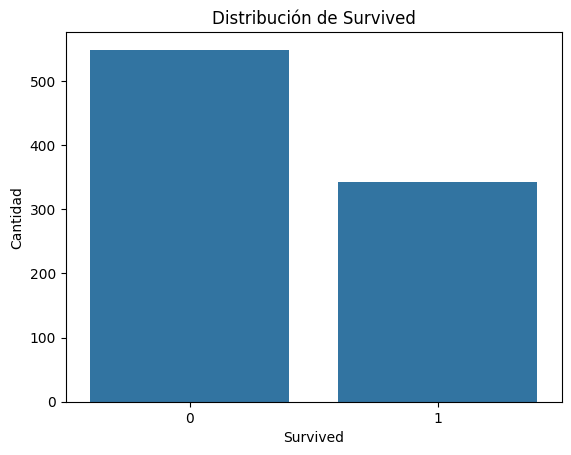


Análisis de who
who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


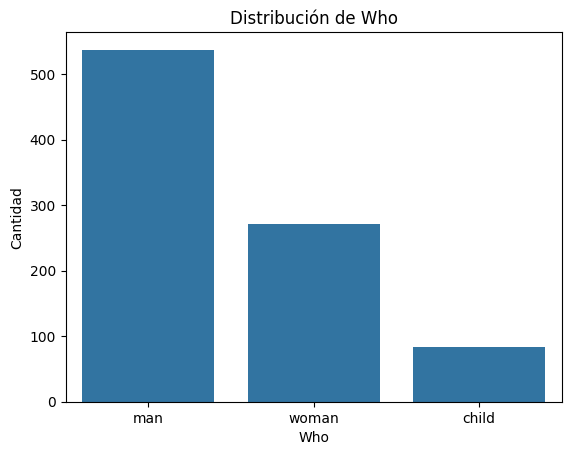


Análisis de class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64


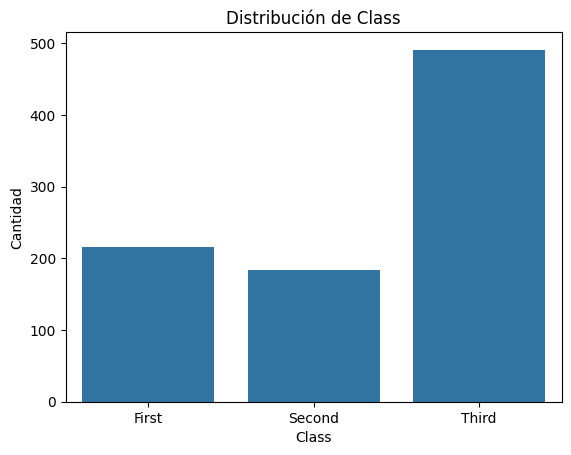


Análisis de embarked
embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64


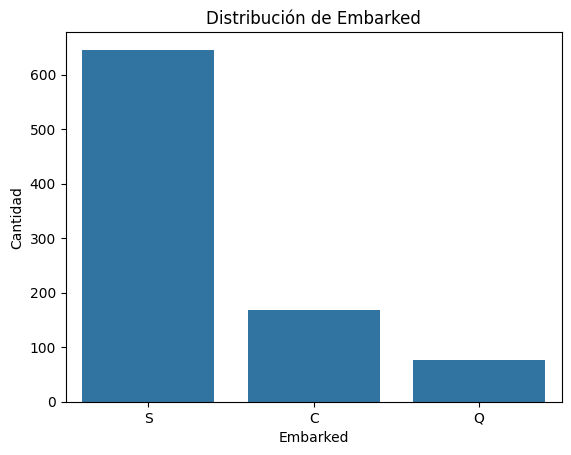


Análisis de alone
alone
True     60.26936
False    39.73064
Name: proportion, dtype: float64


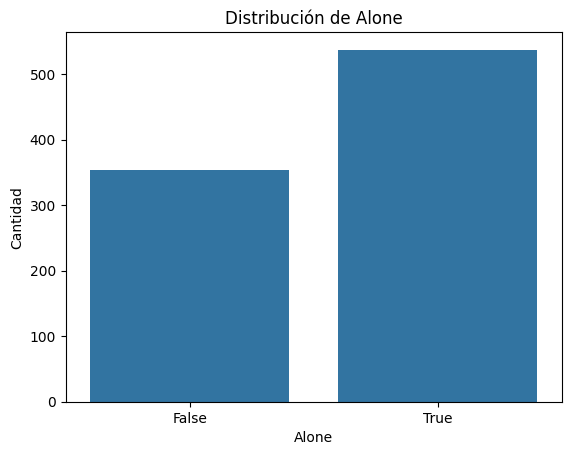

In [36]:
#en el caso de las variables categoricas
categorical_vars = ["survived", "who", "class", "embarked", "alone"]

for var in categorical_vars:
    print(f"\nAnálisis de {var}")
    print(df_titanic[var].value_counts(normalize=True) * 100)
    sns.countplot(data=df_titanic, x=var)
    plt.title(f'Distribución de {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Cantidad')
    plt.show()

In [ ]:
#en el caso de las variables numericas



Análisis de age
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


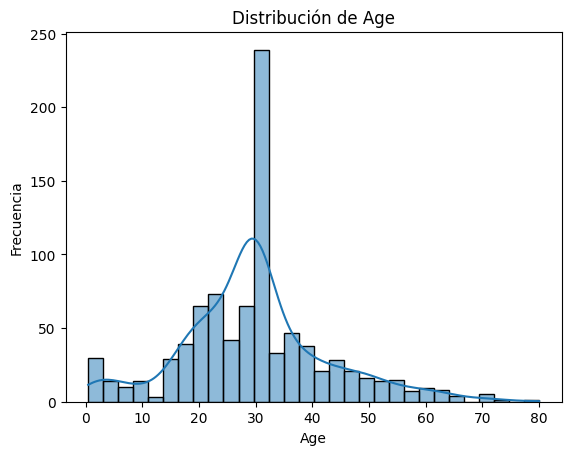


Análisis de fare
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


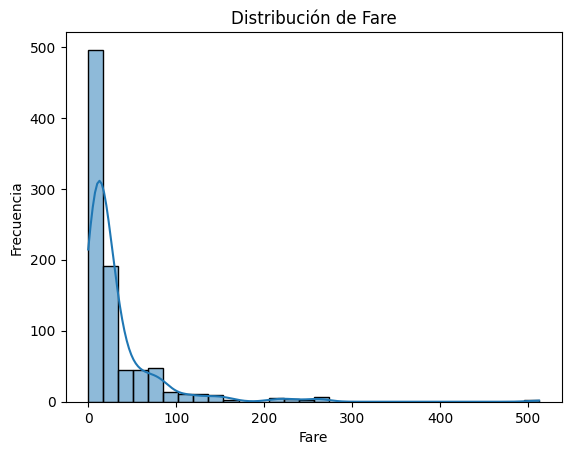

In [37]:
numerical_vars = ["age", "fare"]

for var in numerical_vars:
    print(f"\nAnálisis de {var}")
    print(df_titanic[var].describe())
    sns.histplot(data=df_titanic, x=var, bins=30, kde=True)
    plt.title(f'Distribución de {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frecuencia')
    plt.show()